In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['pdf.fonttype'] = 42  # Use TrueType fonts in PDF
mpl.rcParams['ps.fonttype'] = 42   # Use TrueType fonts in PS
plt.rcParams.update({'font.size': 14})

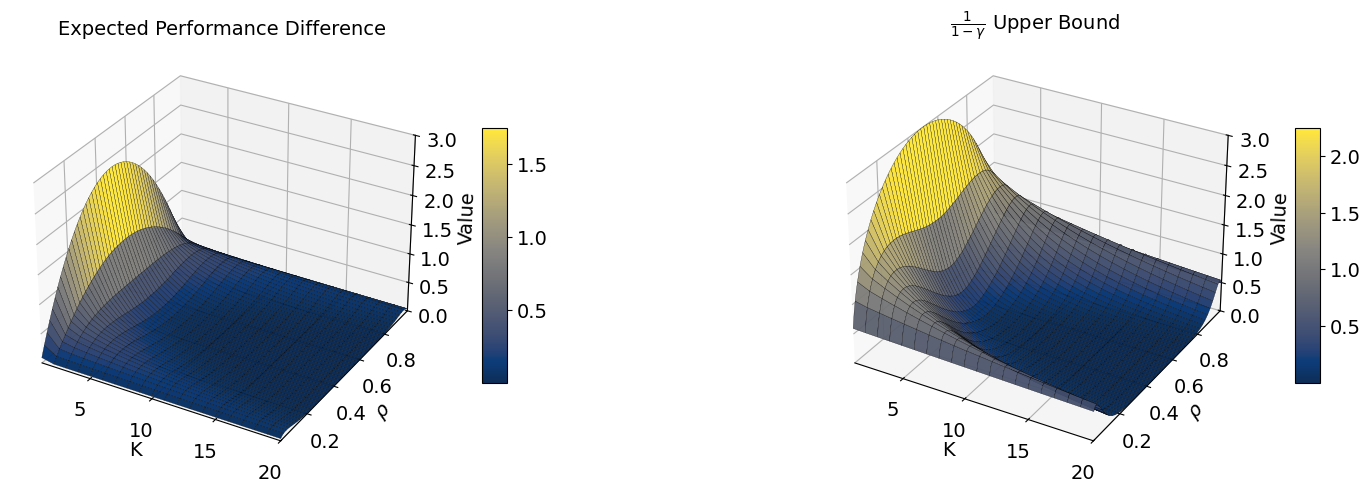

In [6]:
# Define the functions
def E1(K, rho):
    return (6 - 4/3) * (rho**K * (1 - rho) + (1 - rho)**K * rho)

def E2(K, rho):
    return 6 * np.sqrt(rho * (1 - rho)**(2*K) + (rho**(2*K)) * (1 - rho))

# Define grid for K and rho
K_vals = np.linspace(1, 20, 20)
rho_vals = np.linspace(0.01, 0.99, 100)
K_grid, rho_grid = np.meshgrid(K_vals, rho_vals)

# Compute expressions
E1_vals = E1(K_grid, rho_grid)
E2_vals = E2(K_grid, rho_grid)

# Common axis limits
x_limits = (K_vals.min(), K_vals.max())
y_limits = (rho_vals.min(), rho_vals.max())
z_limits = (0, 3)

# Plot settings
fig = plt.figure(figsize=(18, 5))

# Common colormap
cmap = "cividis"

# E1 surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(
    K_grid, rho_grid, E1_vals,
    cmap=cmap,
    edgecolor='k',
    linewidth=0.2,
    antialiased=True,
    alpha=0.95
)
ax1.set_title("Expected Performance Difference", fontsize=14)
ax1.set_xlabel('K')
ax1.set_ylabel(r'$\rho$')
ax1.set_zlabel('Value')
ax1.set_xlim(x_limits)
ax1.set_ylim(y_limits)
ax1.set_zlim(z_limits)
fig.colorbar(surf1, ax=ax1, shrink=0.6, aspect=10)

# E2 surface
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(
    K_grid, rho_grid, E2_vals,
    cmap=cmap,
    edgecolor='k',
    linewidth=0.2,
    antialiased=True,
    alpha=0.95
)
ax2.set_title(r'$\frac{1}{1-\gamma}$'+' Upper Bound', fontsize=14)
ax2.set_xlabel('K')
ax2.set_ylabel(r'$\rho$')
ax2.set_zlabel('Value')
ax2.set_xlim(x_limits)
ax2.set_ylim(y_limits)
ax2.set_zlim(z_limits)
fig.colorbar(surf2, ax=ax2, shrink=0.6, aspect=10)

plt.tight_layout()
plt.show()


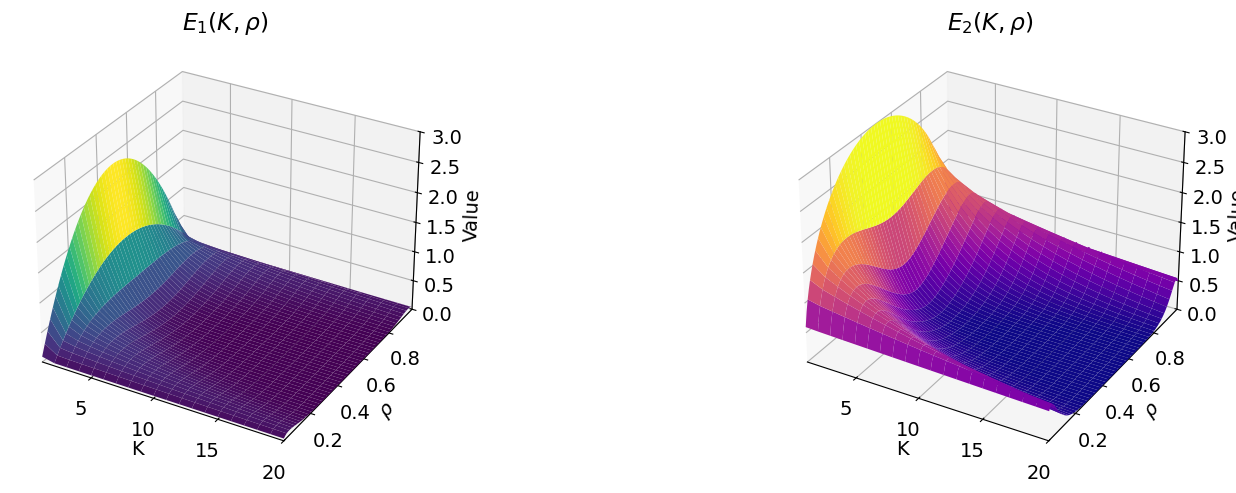

In [5]:
# Define the functions
def E1(K, rho):
    return (6 - 4/3) * (rho**K * (1 - rho) + (1 - rho)**K * rho)

def E2(K, rho):
    return 6 * np.sqrt(rho * (1 - rho)**(2*K) + (rho**(2*K)) * (1 - rho))

# Define grid for K and rho
K_vals = np.linspace(1, 20, 20)
rho_vals = np.linspace(0.01, 0.99, 100)
K_grid, rho_grid = np.meshgrid(K_vals, rho_vals)

# Compute expressions
E1_vals = E1(K_grid, rho_grid)
E2_vals = E2(K_grid, rho_grid)

# Common axis limits
x_limits = (K_vals.min(), K_vals.max())
y_limits = (rho_vals.min(), rho_vals.max())
z_limits = (0, 3)

# Plot settings
fig = plt.figure(figsize=(18, 5))

# E1 surface
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(K_grid, rho_grid, E1_vals, cmap='viridis')
ax1.set_title(r'$E_1(K,\rho)$')
ax1.set_xlabel('K')
ax1.set_ylabel(r'$\rho$')
ax1.set_zlabel('Value')
ax1.set_xlim(x_limits)
ax1.set_ylim(y_limits)
ax1.set_zlim(z_limits)

# E2 surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(K_grid, rho_grid, E2_vals, cmap='plasma')
ax2.set_title(r'$E_2(K,\rho)$')
ax2.set_xlabel('K')
ax2.set_ylabel(r'$\rho$')
ax2.set_zlabel('Value')
ax2.set_xlim(x_limits)
ax2.set_ylim(y_limits)
ax2.set_zlim(z_limits)

plt.tight_layout()
plt.show()


Example one:

In [ ]:
def estimate_max_expectation(M, num_trials=10**5, seed=None):
    """
    Estimate E[max of M i.i.d. N(0,1)] using Monte Carlo simulation.

    Parameters
    ----------
    M : int
        Number of i.i.d. N(0,1) random variables per trial.
    num_trials : int, optional
        Number of Monte Carlo trials (default: 10^5).
    seed : int or None, optional
        Random seed for reproducibility.

    Returns
    -------
    float
        Estimated expectation of the maximum.
    """
    if seed is not None:
        np.random.seed(seed)

    samples = np.random.randn(num_trials, M)
    max_values = np.max(samples, axis=1)
    return np.mean(max_values)

def probability_exactly_N_distinct(M, N, K):
    """
    Compute the probability of getting exactly N distinct numbers
    when sampling K times with replacement from M numbers.
    """
    total = 0
    for i in range(N + 1):
        total += (-1)**i * math.comb(N, i) * (N - i)**K
    
    prob = math.comb(M, N) * total / (M**K)
    return prob

def compute_regret(N):
    expr = estimate_max_expectation(N)
    return expr

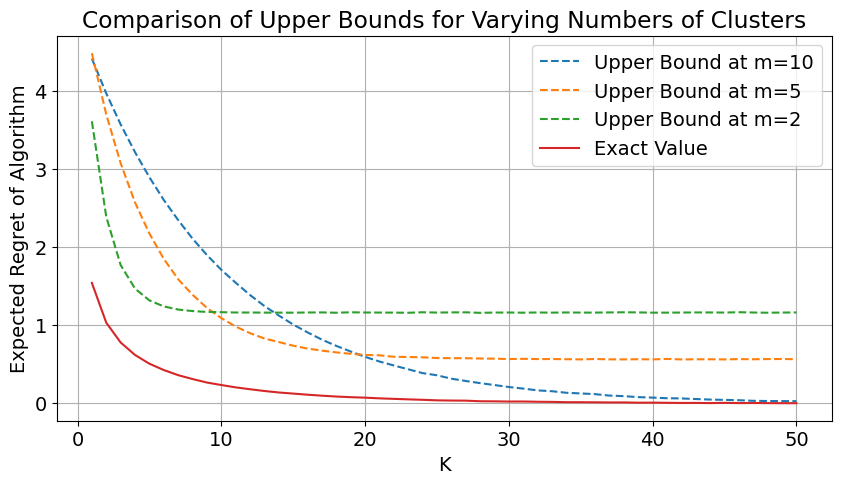

In [ ]:
# Parameters
M = 10                     # you can change this
max_M= estimate_max_expectation(M)

K_values = range(1, 51, 1)  # range of K to plot (start, stop, step)

# --- Compute differences for each K ---
regret=[]

for K in K_values:
    value = 0.0
    N = 1
    while N <= min(M, K):
        p = probability_exactly_N_distinct(M, N, K)
        expr = compute_regret(N)
        value += p * expr
        N += 1
    regret.append(max_M-value)


# Plot
plt.figure(figsize=(10, 5))

for c in [1,2,5]:
    fm_values = [
        estimate_max_expectation(c) + ((1 - 1/int(M/c))**K) * math.sqrt(8*math.log(M) + 4*math.sqrt(2))  #(2 * math.sqrt(2*math.log(M))+math.sqrt(2))
        for K in K_values
    ]
    plt.plot(K_values, fm_values, linestyle='--',label="Upper Bound at m="+str(int(M/c)))
plt.plot(K_values, regret, linestyle='-',label='Exact Value')
# plt.plot(K_values, differences_up, marker='*', linestyle='-')
# plt.plot(K_values, differences_lo, marker='*', linestyle='--')
plt.title("Comparison of Upper Bounds for Varying Numbers of Clusters")
plt.legend()
plt.xlabel("K")
plt.ylabel("Expected Regret of Algorithm")
plt.grid(True)
plt.show()


In [6]:
import numpy as np

In [12]:
# Parameters
np.random.seed(0)  # for reproducibility
num_states = 5
num_actions = 30
gamma = 0.9

# Random transition probabilities P[s, a, s'] — rows must sum to 1
P = np.zeros((num_states, num_actions, num_states))
for s in range(num_states):
    for a in range(num_actions):
        probs = np.random.rand(num_states)
        probs /= probs.sum()  # normalize to sum to 1
        P[s, a] = probs

# Random rewards R[s, a] in range [-10, 10]
R = np.random.uniform(-10, 10, (num_states, num_actions))

In [35]:
actionsub=[16,14,15,25,8]

In [36]:
# Initialize policy arbitrarily
policy = np.random.choice(num_actions, size=num_states)

def policy_evaluation(policy, P, R, gamma, tol=1e-6):
    V = np.zeros(num_states)
    while True:
        delta = 0
        for s in range(num_states):
            a = policy[s]
            v = V[s]
            V[s] = R[s, a] + gamma * np.dot(P[s, a], V)
            delta = max(delta, abs(v - V[s]))
        if delta < tol:
            break
    return V

def policy_improvement(V, P, R, gamma):
    policy_stable = True
    new_policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        old_action = policy[s]
        action_values = [
            R[s, a] + gamma * np.dot(P[s, a], V) for a in actionsub
        ]
        new_policy[s] = actionsub[np.argmax(action_values)]
        if new_policy[s] != old_action:
            policy_stable = False
    return new_policy, policy_stable

# Policy Iteration
iteration = 0
while True:
    print(f"Iteration {iteration}: Policy = {policy}")
    V = policy_evaluation(policy, P, R, gamma)
    policy, stable = policy_improvement(V, P, R, gamma)
    if stable:
        break
    iteration += 1

# Final results
np.set_printoptions(precision=3, suppress=True)
print("\nOptimal Policy:", policy)
print("Value Function:", V)
# print("\nTransition Probabilities P (shape {}):".format(P.shape))
# print(P)
# print("\nReward Matrix R (shape {}):".format(R.shape))
# print(R)


Iteration 0: Policy = [ 1 22  3 16  3]
Iteration 1: Policy = [14 14 15 25  8]
Iteration 2: Policy = [16 14 15 25  8]

Optimal Policy: [16 14 15 25  8]
Value Function: [91.661 91.558 90.363 90.807 90.22 ]


In [49]:
# Initialize policy arbitrarily
policy = np.random.choice(num_actions, size=num_states)

def policy_evaluation(policy, P, R, gamma, tol=1e-6):
    V = np.zeros(num_states)
    while True:
        delta = 0
        for s in range(num_states):
            a = policy[s]
            v = V[s]
            V[s] = R[s, a] + gamma * np.dot(P[s, a], V)
            delta = max(delta, abs(v - V[s]))
        if delta < tol:
            break
    return V

def policy_improvement(V, P, R, gamma):
    policy_stable = True
    new_policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        old_action = policy[s]
        action_values = [
            R[s, a] + gamma * np.dot(P[s, a], V) for a in range(num_actions)
        ]
        new_policy[s] = np.argmax(action_values)
        if new_policy[s] != old_action:
            policy_stable = False
    return new_policy, policy_stable

# Policy Iteration
iteration = 0
while True:
    print(f"Iteration {iteration}: Policy = {policy}")
    V = policy_evaluation(policy, P, R, gamma)
    policy, stable = policy_improvement(V, P, R, gamma)
    if stable:
        break
    iteration += 1

# Final results
np.set_printoptions(precision=3, suppress=True)
print("\nOptimal Policy:", policy)
print("Value Function:", V)
# print("\nTransition Probabilities P (shape {}):".format(P.shape))
# print(P)
# print("\nReward Matrix R (shape {}):".format(R.shape))
# print(R)


Iteration 0: Policy = [ 8 23 19 15  7]
Iteration 1: Policy = [16 14 26 14 19]
Iteration 2: Policy = [16 14 15 14  8]
Iteration 3: Policy = [16 14 15 25  8]

Optimal Policy: [16 14 15 25  8]
Value Function: [91.661 91.558 90.363 90.807 90.22 ]


In [2]:
import numpy as np
from scipy.optimize import linprog
from itertools import product

In [4]:
def generate_all_deterministic_policies(n_states, n_actions):
    """Generate all deterministic policies as one-hot matrices."""
    all_policies = []
    for actions in product(range(n_actions), repeat=n_states):
        policy = np.zeros((n_states, n_actions))
        for s, a in enumerate(actions):
            policy[s, a] = 1
        all_policies.append(policy)
    return all_policies

def decompose_random_policy(pi, deterministic_policies, seed=None):
    """
    Decompose a random policy into a convex combination of deterministic policies.
    You can randomize the LP objective to find different decompositions.
    """
    if seed is not None:
        np.random.seed(seed)
    
    n_states, n_actions = pi.shape
    N = len(deterministic_policies)
    
    # Flatten each deterministic policy
    P = np.array([policy.flatten() for policy in deterministic_policies]).T  # shape: (n_states * n_actions, N)
    b = pi.flatten()

    # Add equality constraints: sum_i λ_i P_i = pi, and sum_i λ_i = 1
    A_eq = np.vstack([P, np.ones(N)])
    b_eq = np.concatenate([b, [1]])

    # Use a random objective to get a different decomposition
    c = np.random.rand(N)

    res = linprog(c=c, A_eq=A_eq, b_eq=b_eq, bounds=[(0, 1)] * N, method="highs")

    if res.success:
        weights = res.x
        decomposition = [(w, deterministic_policies[i]) for i, w in enumerate(weights) if w > 1e-6]
        return decomposition
    else:
        return None

def print_decomposition(decomposition):
    for i, (weight, policy) in enumerate(decomposition):
        print(f"\nPolicy {i + 1}: weight = {weight:.4f}")
        print(policy.astype(int))

In [5]:
# --- Example Usage ---

n_states = 3
n_actions = 2

# Randomized policy: each row is a probability distribution over actions for a state
pi = np.array([
    [0.6, 0.4],
    [0.2, 0.8],
    [0.5, 0.5]
])

print("Target randomized policy:")
print(pi)

# Generate all deterministic policies
det_policies = generate_all_deterministic_policies(n_states, n_actions)

# Get two different decompositions using different seeds
print("\nFirst decomposition:")
decomp1 = decompose_random_policy(pi, det_policies, seed=0)
print_decomposition(decomp1)

print("\nSecond (different) decomposition:")
decomp2 = decompose_random_policy(pi, det_policies, seed=42)
print_decomposition(decomp2)


Target randomized policy:
[[0.6 0.4]
 [0.2 0.8]
 [0.5 0.5]]

First decomposition:

Policy 1: weight = 0.1000
[[1 0]
 [1 0]
 [1 0]]

Policy 2: weight = 0.5000
[[1 0]
 [0 1]
 [0 1]]

Policy 3: weight = 0.1000
[[0 1]
 [1 0]
 [1 0]]

Policy 4: weight = 0.3000
[[0 1]
 [0 1]
 [1 0]]

Second (different) decomposition:

Policy 1: weight = 0.1500
[[1 0]
 [1 0]
 [1 0]]

Policy 2: weight = 0.4500
[[1 0]
 [0 1]
 [0 1]]

Policy 3: weight = 0.0500
[[0 1]
 [1 0]
 [0 1]]

Policy 4: weight = 0.3500
[[0 1]
 [0 1]
 [1 0]]
